In [ ]:
#Installing required pacakage
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.4 MB 10.3 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=cf99260ee302eab24031c068c2b8530996ec6ad22d68799441911edce1961f06
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

import nltk
nltk.download('stopwords')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Importing Pandas to work with dataframe
import pandas as pd     

#Importing numpy for working with numpy arrays and other functions
import numpy as np      

#Importing json for reading the json file of tweets
import json

import re

#Elimination of Stop words
from nltk.corpus import stopwords 
from nltk.util import ngrams 

#Counting the frequency
from collections import Counter

#NLP Toolkit
import nltk


# For visualization:
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Translator from googletrans for tweet translation purpose
from googletrans import Translator

In [14]:
#Reading Json file as a dictonary 
with open("/content/tweets.json") as jfile:

  df = json.load(jfile)

In [15]:
df

{'1374140386071961602': {'tweet_author': 'Hematopoiesis News',
  'tweet_text': '⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'},
 '1374032432173842437': {'tweet_author': 'Michael Wang, MD',
  'tweet_text': 'This phase 2 Acalabrutinib-Venetoclax (AV) trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in MCL patients who either relapsed or non-respondent to the initial therapy.\n\nhttps://t.co/gg0G9At23N'},
 '1373902876553048065': {'tweet_author': '1stOncology',
  'tweet_text': '#NICE backs #AstraZenecas #Calquence for #CLL https://t.co/Vb5lPDoGrA'},
 '1373656782367813635': {'tweet_author': 'Toby Eyre',
  'tweet_text': '#acalabrutinib is a valuable option in pts intolerant to #ibrutinib. Further valuable data to help decision making in #CLL \n\nEarly View | Haematologi

In [16]:
#here we converting the json file to Pandas DataFrame

temp='tweet_author'
lst1 = [val[temp] for key, val in df.items() if temp in val]

temp1='tweet_text'
lst2 = [val[temp1] for key, val in df.items() if temp1 in val]

#Dropping id as it is of no use
data = pd.DataFrame(list(zip(lst1, lst2)),
               columns =['tweet_author', 'tweet_text'])

#For use in objective 2 making a copy of data
data_copy=data.copy()

In [17]:
data

tweet_author                                         tweet_text
0      Hematopoiesis News  ⚕️ Scientists conducted a Phase II study of ac...
1        Michael Wang, MD  This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2             1stOncology  #NICE backs #AstraZenecas #Calquence for #CLL ...
3               Toby Eyre  #acalabrutinib is a valuable option in pts int...
4            Lymphoma Hub  NICE has recommended the use of acalabrutinib ...
...                   ...                                                ...
43342  Joy is a Lifestyle  Hanging out with Friends! :) #FF #CLL #Happine...
43343       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹  Hanging out with Friends! :) #FF #CLL #Happine...
43344               IQWiG  Zusatznutzen von #Idelalisib ist weder für #CL...
43345           Medibooks  #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...
43346           Medibooks  #Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...

[43347 rows x 2 columns]

In [ ]:
Converting Tweets into English

#Function for translating the tweets into English
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.kr',
    ])
data['tweet_text'].astype(str)
data = data.loc[data['tweet_text'] != '']

#Replacing '.' with '. ' for Data translation issue
data['tweet_text'] = data['tweet_text'].str.replace('.', '. ')
 
#Some tweets are in japanese so converting it into english
data['tweet_text']=data['tweet_text'].apply(translator.translate, src='ja', dest='en').apply(getattr, args=('text',))
# data['clean_tweet']=data['clean_tweet'].apply(translator.translate, src='hi', dest='en').apply(getattr, args=('text',))

In [18]:
#Function to remove the sentences starting with particular character or pattern
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [20]:
data

tweet_author                                         tweet_text
0      Hematopoiesis News  ⚕️ Scientists conducted a Phase II study of ac...
1        Michael Wang, MD  This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2             1stOncology  #NICE backs #AstraZenecas #Calquence for #CLL ...
3               Toby Eyre  #acalabrutinib is a valuable option in pts int...
4            Lymphoma Hub  NICE has recommended the use of acalabrutinib ...
...                   ...                                                ...
43342  Joy is a Lifestyle  Hanging out with Friends! :) #FF #CLL #Happine...
43343       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹  Hanging out with Friends! :) #FF #CLL #Happine...
43344               IQWiG  Zusatznutzen von #Idelalisib ist weder für #CL...
43345           Medibooks  #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...
43346           Medibooks  #Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...

[43347 rows x 2 columns]

In [21]:
#removing hashtags (word starting with #)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['tweet_text'], "#[\w]*")

#removing hashtags (word starting with https)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "https[\w]*")

#remove user, https, and RT
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], "https|RT|@[\w]*")

#remove punctuations
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

#lowering string
data['clean_tweet'] = data['clean_tweet'].str.lower()

#remove stop words
stop_words = set(stopwords.words('english')) 


# #remove words with len < 2
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [22]:
#Creating a list of clean tweets 
data['clean_tweet'] = [' '.join([w for w in x.lower().split() if w not in stop_words]) 
    for x in data['clean_tweet'].tolist()]

In [23]:
#Visualizing Clean Tweets
data

tweet_author                                         tweet_text  \
0      Hematopoiesis News  ⚕️ Scientists conducted a Phase II study of ac...   
1        Michael Wang, MD  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2             1stOncology  #NICE backs #AstraZenecas #Calquence for #CLL ...   
3               Toby Eyre  #acalabrutinib is a valuable option in pts int...   
4            Lymphoma Hub  NICE has recommended the use of acalabrutinib ...   
...                   ...                                                ...   
43342  Joy is a Lifestyle  Hanging out with Friends! :) #FF #CLL #Happine...   
43343       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹  Hanging out with Friends! :) #FF #CLL #Happine...   
43344               IQWiG  Zusatznutzen von #Idelalisib ist weder für #CL...   
43345           Medibooks  #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...   
43346           Medibooks  #Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...   

                                             clean_tweet  
0      scientists conducted phase study acalabrutinib...  
1      phase acalabrutinib venetoclax trial still rec...  
2                                          backs lpdogra  
3      valuable option pts intolerant valuable data h...  
4      nice recommended use acalabrutinib patients tr...  
...                                                  ...  
43342                    hanging friends http pdleww bbb  
43343                     hanging friends http gynchdnul  
43344  zusatznutzen von ist weder noch refrakt res fo...  
43345  ptk expression immunochemotherapy outcome chro...  
43346  mutations tlr myd pathway identify subset youn...  

[43347 rows x 3 columns]

In [24]:
#Checking the difference in the tweets and clean_tweets

print(data['clean_tweet'][0])
print(data['tweet_text'][0])

scientists conducted phase study acalabrutinib patients relapsed refractory ibrutinib intolerant found overall response rate qpc kuzz
⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%.  
https://t. co/eJ6m4QpC5P https://t. co/kuZz6ZO47r


In [25]:
#Importing TextBlob for looking for noun_Phrases into the tweets 

#An example from the extraction of noun_phrases on the sentence from assignment example
from textblob import TextBlob
wiki = TextBlob('Pink Pearl Apples are tasty but Empire Apples are not.')
wiki.noun_phrases

WordList(['pink pearl apples', 'apples'])

In [26]:
#Applying over the clean tweets column to extract the entities

from textblob import TextBlob
# nltk.download('wordnet')
# nltk.download('brown')
# nltk.download('punkt')

def blob(text):
  return TextBlob(text).noun_phrases

Entities = data['clean_tweet'].apply(blob)
data["entities"]=Entities

In [27]:
#Dataframe Visualization
data

tweet_author                                         tweet_text  \
0      Hematopoiesis News  ⚕️ Scientists conducted a Phase II study of ac...   
1        Michael Wang, MD  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2             1stOncology  #NICE backs #AstraZenecas #Calquence for #CLL ...   
3               Toby Eyre  #acalabrutinib is a valuable option in pts int...   
4            Lymphoma Hub  NICE has recommended the use of acalabrutinib ...   
...                   ...                                                ...   
43342  Joy is a Lifestyle  Hanging out with Friends! :) #FF #CLL #Happine...   
43343       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹  Hanging out with Friends! :) #FF #CLL #Happine...   
43344               IQWiG  Zusatznutzen von #Idelalisib ist weder für #CL...   
43345           Medibooks  #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...   
43346           Medibooks  #Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...   

                                             clean_tweet  \
0      scientists conducted phase study acalabrutinib...   
1      phase acalabrutinib venetoclax trial still rec...   
2                                          backs lpdogra   
3      valuable option pts intolerant valuable data h...   
4      nice recommended use acalabrutinib patients tr...   
...                                                  ...   
43342                    hanging friends http pdleww bbb   
43343                     hanging friends http gynchdnul   
43344  zusatznutzen von ist weder noch refrakt res fo...   
43345  ptk expression immunochemotherapy outcome chro...   
43346  mutations tlr myd pathway identify subset youn...   

                                                entities  
0      [phase study acalabrutinib patients, refractor...  
1      [phase acalabrutinib venetoclax trial, recruit...  
2                                        [backs lpdogra]  
3      [valuable option pts intolerant, valuable data...  
4      [acalabrutinib patients treatment chronic lymp...  
...                                                  ...  
43342                          [friends http pdleww bbb]  
43343                           [friends http gynchdnul]  
43344  [zusatznutzen von ist weder noch refrakt res f...  
43345  [ptk expression immunochemotherapy outcome chr...  
43346  [mutations tlr myd pathway identify subset, yo...  

[43347 rows x 4 columns]

In [28]:
#Combining words into one list and count the appearance of each entity.

# from functools import reduce
# l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_tweet))
l=data["entities"]

#Counting the most repeated entity
flatten = [item for sublist in l for item in sublist]
counts = Counter(flatten).most_common()

In [29]:
#Creating a dataframe
entity_df = pd.DataFrame.from_records(counts, columns=['entity', 'frequency'])
entity_df['entity']= entity_df['entity'].apply(lambda x: ''.join([w for w in x]))

In [30]:
#New dataframe of most entity and there occurence
entity_df.head(10)

entity  frequency
0             chronic lymphocytic leukemia       1102
1                        cancer adults amp        373
2                              new article        284
3                                new trial        250
4  refractory chronic lymphocytic leukemia        216
5         chronic lymphocytic leukemia cll        177
6                                high risk        163
7            powerful new kind cancer drug        162
8                             fda approves        159
9                        available placebo        155

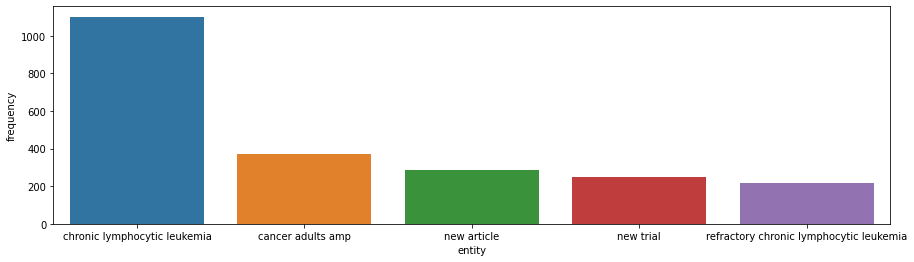

In [31]:
#Data Visualization with bar graph
df_new=entity_df.copy()

df_new = df_new.nlargest(columns="frequency", n = 5) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_new, x= "entity", y = "frequency")
ax.set(ylabel = 'frequency')
plt.show()

In [34]:
entity_df.to_csv("C://Users/ARJUN/Downloads/NLP projects/objective1.csv")

In [35]:
#Creating the copy of the dataframe for further use
data2=data.copy()
data2

tweet_author                                         tweet_text  \
0      Hematopoiesis News  ⚕️ Scientists conducted a Phase II study of ac...   
1        Michael Wang, MD  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2             1stOncology  #NICE backs #AstraZenecas #Calquence for #CLL ...   
3               Toby Eyre  #acalabrutinib is a valuable option in pts int...   
4            Lymphoma Hub  NICE has recommended the use of acalabrutinib ...   
...                   ...                                                ...   
43342  Joy is a Lifestyle  Hanging out with Friends! :) #FF #CLL #Happine...   
43343       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹  Hanging out with Friends! :) #FF #CLL #Happine...   
43344               IQWiG  Zusatznutzen von #Idelalisib ist weder für #CL...   
43345           Medibooks  #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...   
43346           Medibooks  #Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...   

                                             clean_tweet  \
0      scientists conducted phase study acalabrutinib...   
1      phase acalabrutinib venetoclax trial still rec...   
2                                          backs lpdogra   
3      valuable option pts intolerant valuable data h...   
4      nice recommended use acalabrutinib patients tr...   
...                                                  ...   
43342                    hanging friends http pdleww bbb   
43343                     hanging friends http gynchdnul   
43344  zusatznutzen von ist weder noch refrakt res fo...   
43345  ptk expression immunochemotherapy outcome chro...   
43346  mutations tlr myd pathway identify subset youn...   

                                                entities  
0      [phase study acalabrutinib patients, refractor...  
1      [phase acalabrutinib venetoclax trial, recruit...  
2                                        [backs lpdogra]  
3      [valuable option pts intolerant, valuable data...  
4      [acalabrutinib patients treatment chronic lymp...  
...                                                  ...  
43342                          [friends http pdleww bbb]  
43343                           [friends http gynchdnul]  
43344  [zusatznutzen von ist weder noch refrakt res f...  
43345  [ptk expression immunochemotherapy outcome chr...  
43346  [mutations tlr myd pathway identify subset, yo...  

[43347 rows x 4 columns]

In [36]:
#Importing required library
import pandas as pd
import re
import plotly.express as px
import nltk
import spacy

In [37]:
nlp = spacy.load('en_core_web_sm')

In [38]:
#installing vaderSentiment for utilization of SentimentIntensityAnalyzer
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.3 MB/s 


In [39]:
#Importing the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

#Sentiment Analysis
SIA = SentimentIntensityAnalyzer()

data2["clean_tweet"]= data2["entities"].astype(str)
# Applying Model, Variable Creation
data2['Polarity Score']=data2["entities"].apply(lambda x:SIA.polarity_scores(x)['compound'])
data2['Neutral Score']=data2["entities"].apply(lambda x:SIA.polarity_scores(x)['neu'])
data2['Negative Score']=data2["entities"].apply(lambda x:SIA.polarity_scores(x)['neg'])
data2['Positive Score']=data2["entities"].apply(lambda x:SIA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
data2['overall polarity']=''
data2.loc[data2['Polarity Score']>0,'overall polarity']='Positive'
data2.loc[data2['Polarity Score']==0,'overall polarity']='Neutral'
data2.loc[data2['Polarity Score']<0,'overall polarity']='Negative'
data2[:5]

tweet_author                                         tweet_text  \
0  Hematopoiesis News  ⚕️ Scientists conducted a Phase II study of ac...   
1    Michael Wang, MD  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2         1stOncology  #NICE backs #AstraZenecas #Calquence for #CLL ...   
3           Toby Eyre  #acalabrutinib is a valuable option in pts int...   
4        Lymphoma Hub  NICE has recommended the use of acalabrutinib ...   

                                         clean_tweet  \
0  ['phase study acalabrutinib patients', 'refrac...   
1  ['phase acalabrutinib venetoclax trial', 'recr...   
2                                  ['backs lpdogra']   
3  ['valuable option pts intolerant', 'valuable d...   
4  ['acalabrutinib patients treatment chronic lym...   

                                            entities  Polarity Score  \
0  [phase study acalabrutinib patients, refractor...          0.0000   
1  [phase acalabrutinib venetoclax trial, recruit...          0.0000   
2                                    [backs lpdogra]         -0.0516   
3  [valuable option pts intolerant, valuable data...          0.4767   
4  [acalabrutinib patients treatment chronic lymp...          0.0000   

   Neutral Score  Negative Score  Positive Score overall polarity  
0          1.000           0.000           0.000          Neutral  
1          1.000           0.000           0.000          Neutral  
2          0.455           0.545           0.000         Negative  
3          0.693           0.000           0.307         Positive  
4          1.000           0.000           0.000          Neutral

In [40]:
# Copying data2 in data3 for changing the the format for submission and conversion in csv file.
data3=data2.copy()

In [41]:
data3

tweet_author                                         tweet_text  \
0      Hematopoiesis News  ⚕️ Scientists conducted a Phase II study of ac...   
1        Michael Wang, MD  This phase 2 Acalabrutinib-Venetoclax (AV) tri...   
2             1stOncology  #NICE backs #AstraZenecas #Calquence for #CLL ...   
3               Toby Eyre  #acalabrutinib is a valuable option in pts int...   
4            Lymphoma Hub  NICE has recommended the use of acalabrutinib ...   
...                   ...                                                ...   
43342  Joy is a Lifestyle  Hanging out with Friends! :) #FF #CLL #Happine...   
43343       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹  Hanging out with Friends! :) #FF #CLL #Happine...   
43344               IQWiG  Zusatznutzen von #Idelalisib ist weder für #CL...   
43345           Medibooks  #Hematología PTK2 EXPRESSION AND IMMUNOCHEMOTH...   
43346           Medibooks  #Hematología MUTATIONS IN TLR/MYD88 PATHWAY ID...   

                                             clean_tweet  \
0      ['phase study acalabrutinib patients', 'refrac...   
1      ['phase acalabrutinib venetoclax trial', 'recr...   
2                                      ['backs lpdogra']   
3      ['valuable option pts intolerant', 'valuable d...   
4      ['acalabrutinib patients treatment chronic lym...   
...                                                  ...   
43342                        ['friends http pdleww bbb']   
43343                         ['friends http gynchdnul']   
43344  ['zusatznutzen von ist weder noch refrakt res ...   
43345  ['ptk expression immunochemotherapy outcome ch...   
43346  ['mutations tlr myd pathway identify subset', ...   

                                                entities  Polarity Score  \
0      [phase study acalabrutinib patients, refractor...          0.0000   
1      [phase acalabrutinib venetoclax trial, recruit...          0.0000   
2                                        [backs lpdogra]         -0.0516   
3      [valuable option pts intolerant, valuable data...          0.4767   
4      [acalabrutinib patients treatment chronic lymp...          0.0000   
...                                                  ...             ...   
43342                          [friends http pdleww bbb]          0.4767   
43343                           [friends http gynchdnul]          0.4767   
43344  [zusatznutzen von ist weder noch refrakt res f...          0.0000   
43345  [ptk expression immunochemotherapy outcome chr...          0.0000   
43346  [mutations tlr myd pathway identify subset, yo...          0.0000   

       Neutral Score  Negative Score  Positive Score overall polarity  
0              1.000           0.000           0.000          Neutral  
1              1.000           0.000           0.000          Neutral  
2              0.455           0.545           0.000         Negative  
3              0.693           0.000           0.307         Positive  
4              1.000           0.000           0.000          Neutral  
...              ...             ...             ...              ...  
43342          0.492           0.000           0.508         Positive  
43343          0.392           0.000           0.608         Positive  
43344          1.000           0.000           0.000          Neutral  
43345          1.000           0.000           0.000          Neutral  
43346          1.000           0.000           0.000          Neutral  

[43347 rows x 9 columns]

In [42]:
#Dropping the excess columns
data3=data3.drop(['tweet_text',	'clean_tweet',	'Polarity Score',	'Neutral Score',	'Negative Score',	'Positive Score'], axis=1)

In [43]:
data3

tweet_author                                           entities  \
0      Hematopoiesis News  [phase study acalabrutinib patients, refractor...   
1        Michael Wang, MD  [phase acalabrutinib venetoclax trial, recruit...   
2             1stOncology                                    [backs lpdogra]   
3               Toby Eyre  [valuable option pts intolerant, valuable data...   
4            Lymphoma Hub  [acalabrutinib patients treatment chronic lymp...   
...                   ...                                                ...   
43342  Joy is a Lifestyle                          [friends http pdleww bbb]   
43343       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹                           [friends http gynchdnul]   
43344               IQWiG  [zusatznutzen von ist weder noch refrakt res f...   
43345           Medibooks  [ptk expression immunochemotherapy outcome chr...   
43346           Medibooks  [mutations tlr myd pathway identify subset, yo...   

      overall polarity  
0              Neutral  
1              Neutral  
2             Negative  
3             Positive  
4              Neutral  
...                ...  
43342         Positive  
43343         Positive  
43344          Neutral  
43345          Neutral  
43346          Neutral  

[43347 rows x 3 columns]

In [44]:
#Changing the format 
data3=data3[['entities','tweet_author','overall polarity']]

In [45]:
data3.rename(columns = {'entities':'entity','tweet_author':'author'}, inplace = True)

In [46]:
data3

entity              author  \
0      [phase study acalabrutinib patients, refractor...  Hematopoiesis News   
1      [phase acalabrutinib venetoclax trial, recruit...    Michael Wang, MD   
2                                        [backs lpdogra]         1stOncology   
3      [valuable option pts intolerant, valuable data...           Toby Eyre   
4      [acalabrutinib patients treatment chronic lymp...        Lymphoma Hub   
...                                                  ...                 ...   
43342                          [friends http pdleww bbb]  Joy is a Lifestyle   
43343                           [friends http gynchdnul]       𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹   
43344  [zusatznutzen von ist weder noch refrakt res f...               IQWiG   
43345  [ptk expression immunochemotherapy outcome chr...           Medibooks   
43346  [mutations tlr myd pathway identify subset, yo...           Medibooks   

      overall polarity  
0              Neutral  
1              Neutral  
2             Negative  
3             Positive  
4              Neutral  
...                ...  
43342         Positive  
43343         Positive  
43344          Neutral  
43345          Neutral  
43346          Neutral  

[43347 rows x 3 columns]

In [48]:
data3.to_csv("C://Users/ARJUN/Downloads/NLP projects/objective2.csv")